<a href="https://colab.research.google.com/github/GHROTH-L/-ai-ml-training-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #畫圖使用
%matplotlib inline

In [ ]:
#將dataframe 下載下來
from google.colab import files

#讀取資料

In [ ]:
from google.colab import files
# 上傳
uploaded = files.upload()
uploaded2 = files.upload()

Saving test.csv to test.csv


Saving train.csv to train.csv


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded2['train.csv']))

In [ ]:
print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pcl

#處理各變項部分

In [ ]:
#將兩筆資料合併一起，處理data，之後再做分開
t_data = test.append(train)

In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##存活數

<AxesSubplot:xlabel='Survived', ylabel='count'>

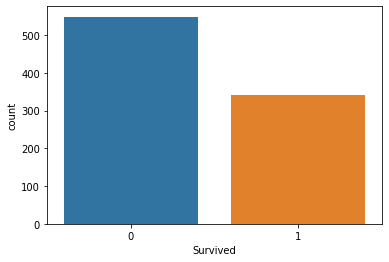

In [ ]:
sns.countplot(data=train, x='Survived') #可以看出存活與死亡人數比，並未差距過大

##艙等

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

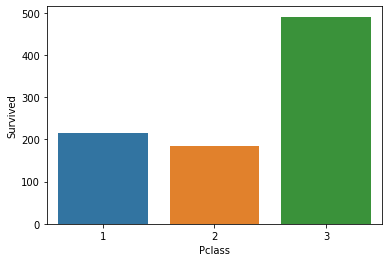

In [ ]:
sns.countplot(data=train, x='Pclass')#三等艙最差人數最多

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

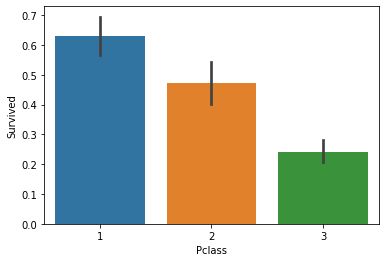

In [ ]:
sns.barplot(x=train['Pclass'], y=train['Survived'])#存活率越低

##性別

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

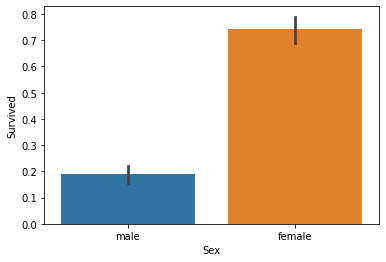

In [ ]:
sns.barplot(x=train['Sex'], y=train['Survived'])#女性存活數最高

In [ ]:
t_data["Sex"] = t_data["Sex"].map({'female':1,'male':0}).astype('int')
#將其改為01

##age

In [ ]:
# qcut 可以將資料分為不同百分比
train['Age_q4']= pd.qcut(train['Age'],4) #依年齡區分四個區間
train['Age_q4'].unique()

[(20.125, 28.0], (28.0, 38.0], NaN, (38.0, 80.0], (0.419, 20.125]]
Categories (4, interval[float64, right]): [(0.419, 20.125] < (20.125, 28.0] < (28.0, 38.0] <
                                           (38.0, 80.0]]

In [ ]:
train['Age_q6']= pd.qcut(train['Age'],6) #依年齡分成八個區間
train['Age_q6'].unique()

[(18.0, 23.0], (34.0, 44.0], (23.0, 28.0], NaN, (44.0, 80.0], (0.419, 18.0], (28.0, 34.0]]
Categories (6, interval[float64, right]): [(0.419, 18.0] < (18.0, 23.0] < (23.0, 28.0] <
                                           (28.0, 34.0] < (34.0, 44.0] < (44.0, 80.0]]

In [ ]:
train['Age_q8']= pd.qcut(train['Age'],8) #依年齡分成八個區間
train['Age_q8'].unique()

[(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] <
                                           (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] <
                                           (38.0, 47.0] < (47.0, 80.0]]

In [ ]:
train['Age_q10']= pd.qcut(train['Age'],10) #依年齡分成八個區間
train['Age_q10'].unique()

[(19.0, 22.0], (36.0, 41.0], (25.0, 28.0], (31.8, 36.0], NaN, ..., (0.419, 14.0], (28.0, 31.8], (14.0, 19.0], (41.0, 50.0], (22.0, 25.0]]
Length: 11
Categories (10, interval[float64, right]): [(0.419, 14.0] < (14.0, 19.0] < (19.0, 22.0] <
                                            (22.0, 25.0] ... (31.8, 36.0] < (36.0, 41.0] <
                                            (41.0, 50.0] < (50.0, 80.0]]

<AxesSubplot:xlabel='Age_q4', ylabel='Survived'>

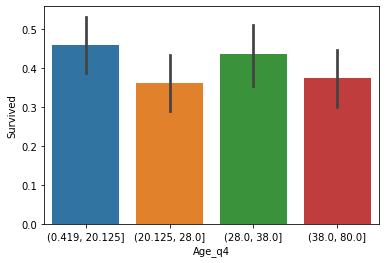

In [ ]:
sns.barplot(x=train['Age_q4'], y=train['Survived'])

<AxesSubplot:xlabel='Age_q6', ylabel='Survived'>

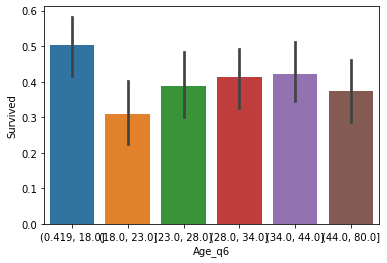

In [ ]:
sns.barplot(x=train['Age_q6'], y=train['Survived'])

<AxesSubplot:xlabel='Age_q8', ylabel='Survived'>

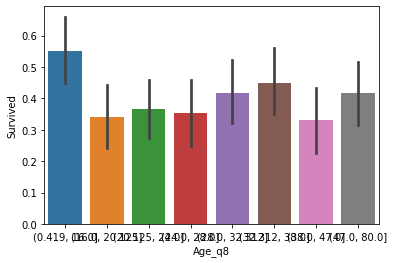

In [ ]:
sns.barplot(x=train['Age_q8'], y=train['Survived'])

<AxesSubplot:xlabel='Age_q10', ylabel='Survived'>

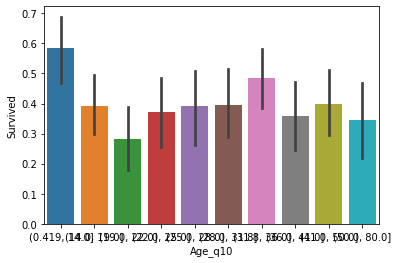

In [ ]:
sns.barplot(x=train['Age_q10'], y=train['Survived'])

In [ ]:
#14歲以下的存活率最高，其他看起來平均，所以將14歲設置為1其他為2(包含null)
t_data.loc[train['Age']<=14,'Age']=1
t_data.loc[train['Age']!=1,'Age']=2

In [ ]:
t_data['Age'].unique()

array([2., 1.])

##subsp(兄弟姊妹與配偶數量)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

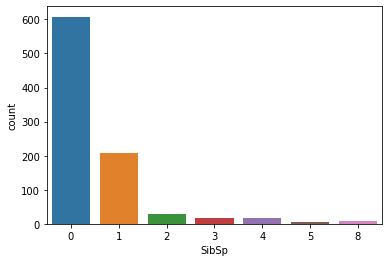

In [ ]:
sns.countplot(x= train['SibSp']) #大多是為0其餘為1

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

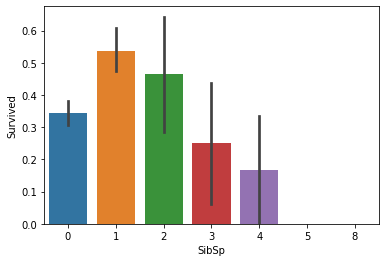

In [ ]:
sns.barplot(x=train['SibSp'], y=train['Survived']) #有一兩位時存活率最高

In [ ]:
#將SibSp等於1或2設為1，大於2為2 ，剩下的為0(共三階層)
t_data.loc[(train['SibSp']==1) | (train['SibSp']==2),'SipSp' ]=1
t_data.loc[(train['SibSp']>2),'SipSp' ]=2
t_data.loc[(train['SibSp']<1),'SipSp' ]=0

##Parch(父母與小孩數量)

<AxesSubplot:xlabel='Parch', ylabel='count'>

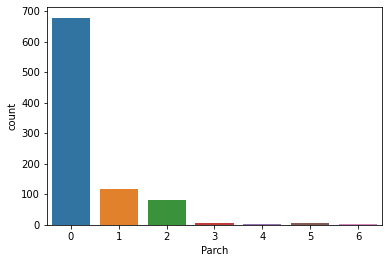

In [ ]:
sns.countplot(x= train['Parch'])

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

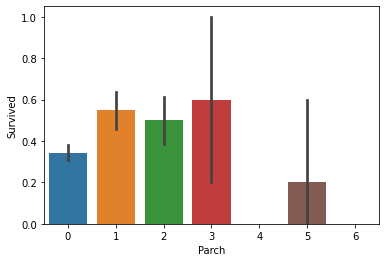

In [ ]:
sns.barplot(x=train['Parch'], y=train['Survived'])

In [ ]:
#123一個特徵，0一個特徵，456一個特徵
t_data.loc[(train['Parch']>0) & (train['Parch']<4),'Parch' ]=1
t_data.loc[(train['Parch']>3),'Parch' ]=2
t_data.loc[(train['Parch']<1),'Parch' ]=0

##Fare(票價)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

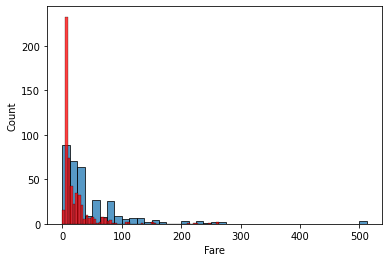

In [ ]:
sns.histplot(t_data[t_data['Survived']==1]['Fare'])
sns.histplot(t_data[t_data['Survived']==0]['Fare'],color='red')

In [ ]:
print(t_data[t_data['Survived']==1]['Fare'].describe())
print(t_data[t_data['Survived']==0]['Fare'].describe())
#26塊以上會有百分之50的機率存活
#10快以下有百分之50的機率死翹翹

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


In [ ]:
#取26 57為區隔
t_data.loc[(train['Fare']>26) & (train['Fare']<58),'Fare' ]=1
t_data.loc[(train['Fare']>57),'Fare' ]=2
t_data.loc[(train['Fare']<27),'Fare' ]=0

In [ ]:
t_data['Fare'].unique()

array([ 0., nan])

##Embarked(登船位置)

In [ ]:
t_data['Embarked'].unique()

array(['Q', 'S', 'C', nan], dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

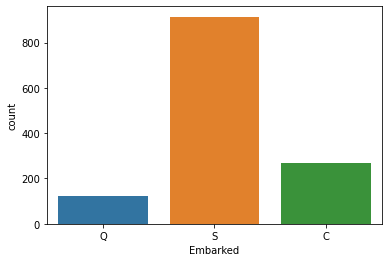

In [ ]:
sns.countplot(t_data['Embarked'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

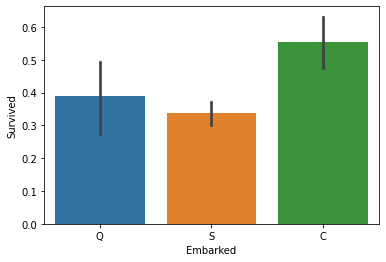

In [ ]:
sns.barplot(x= t_data['Embarked'], y =t_data['Survived'] )

In [ ]:
t_data['Embarked'].isnull().sum() #只有兩個缺失值，所以用眾數頂替
t_data['Embarked']= t_data['Embarked'].fillna('S')

In [ ]:
#將QSC轉為數字
t_data['Embarked'] = t_data['Embarked'].map({'Q':0, 'S':1, 'C':2 }).astype('int')

#將資料分開與正規化

In [ ]:
#需要先把dataframe轉成array
train_x = t_data[t_data['Survived'].notnull()][['Sex','Age','Pclass','SibSp','Parch','Embarked','Fare']]
train_y = t_data[t_data['Survived'].notnull()][['Survived']]
test_x = t_data[t_data['Survived'].isnull()][['PassengerId','Sex','Age','Pclass','SibSp','Parch','Embarked','Fare']]

In [ ]:
"""
#將資料正規化
'''
縮小資料的呈現比例
可使數值呈現在一定的範圍內
使我們在訓練模型時，增加梯度下降的容易度並提升模型效果
https://ithelp.ithome.com.tw/articles/10266671
'''
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

train_x = sc.fit_transform(train_x)
test_x_dropid = test_x.drop(labels=['PassengerId'],axis=1) #因為id不算在模型裡面
test_x_dropid = sc.transform(test_x_dropid)
 #fit_transfor通常用來正規化training set 而 transform用來正規化testing set

正規化後反而準確值下降
"""

"\n#將資料正規化\n'''\n縮小資料的呈現比例\n可使數值呈現在一定的範圍內\n使我們在訓練模型時，增加梯度下降的容易度並提升模型效果\nhttps://ithelp.ithome.com.tw/articles/10266671\n'''\nfrom sklearn.preprocessing import StandardScaler\n\nsc= StandardScaler()\n\ntrain_x = sc.fit_transform(train_x)\ntest_x_dropid = test_x.drop(labels=['PassengerId'],axis=1) #因為id不算在模型裡面\ntest_x_dropid = sc.transform(test_x_dropid)\n #fit_transfor通常用來正規化training set 而 transform用來正規化testing set\n"

#隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split =20,oob_score=True)
forest.fit(train_x,train_y)
print('Base oob score:{}'.format(forest.oob_score_))

<ipython-input-202-f1f8e87a1903>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_x,train_y)


Base oob score:0.8125701459034792


In [ ]:
#將預測繳交
forest_pred = forest.predict(test_x_dropid)
forest_sub = pd.DataFrame({"PassengerId":test_x['PassengerId'],
                "Survived":forest_pred.astype(int)})
forest_sub.to_csv('forest_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('forest_sub.csv')

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#SVM

In [ ]:
from sklearn import svm
svm = svm.LinearSVC( random_state= 69)
#svm.LinearSVC()是svm的classifier
#svm.LinearSVR()是svm的regression
#這裡是要二分，所以使用svc

In [ ]:
svm.fit(train_x,train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=69)

In [ ]:
svm.score(train_x,train_y) #查看分數

0.8035914702581369

In [ ]:
#將預測繳交
svm_pred = svm.predict(test_x_dropid)
svm_sub = pd.DataFrame({"PassengerId":test_x['PassengerId'],
                "Survived":svm_pred.astype(int)})
svm_sub.to_csv('svm_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('svm_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#DNN

In [ ]:
# 這個做 ONEHOT RECODING
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
#需要先把dataframe轉成array
train_xx = t_data[t_data['Survived'].notnull()][['Sex','Age','Pclass','SibSp','Parch','Embarked','Fare']].values
train_yy = t_data[t_data['Survived'].notnull()][['Survived']].values
test_xx = t_data[t_data['Survived'].isnull()][['PassengerId','Sex','Age','Pclass','SibSp','Parch','Embarked','Fare']].values

In [ ]:
#spliting the dataset to work on train and test


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_xx, train_yy, test_size=0.3, random_state=69)

In [ ]:
y_train = to_categorical(y_train, 2)
#做成ONEHOTRECODING
y_test = to_categorical(y_test, 2)

##打造神經網路

In [ ]:
dnn_model = Sequential()

In [ ]:
dnn_model.add(Dense(100, input_dim=7, activation='relu'))
dnn_model.add(Dense(100, activation='relu'))
dnn_model.add(Dense(100, activation='relu'))
dnn_model.add(Dense(100, activation='relu'))
dnn_model.add(Dense(100, activation='relu'))
dnn_model.add(Dense(2, activation='softmax'))

In [ ]:
dnn_model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

In [ ]:
y_train[1]

array([0., 1.], dtype=float32)

##訓練

In [ ]:
dnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=30, epochs=20)
#顯示訓練結果
score = dnn_model.evaluate(X_test, y_test)
print ('\nTrain Acc:', score[1])

Epoch 1/20
17/17 [==============================] - 2s 22ms/step - loss: 0.6839 - accuracy: 0.6145 - val_loss: 0.6770 - val_accuracy: 0.6000
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6688 - accuracy: 0.6145 - val_loss: 0.6671 - val_accuracy: 0.6000
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.6145 - val_loss: 0.6550 - val_accuracy: 0.6000
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6409 - accuracy: 0.6145 - val_loss: 0.6365 - val_accuracy: 0.6000
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.6162 - accuracy: 0.6145 - val_loss: 0.6027 - val_accuracy: 0.6000
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.5780 - accuracy: 0.7771 - val_loss: 0.5550 - val_accuracy: 0.7920
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 0.5224 - accuracy: 0.8112 - val_loss: 0.5192 - val_accuracy: 0.7840
Epoch 8/20
17/17 [=

In [ ]:
score = dnn_model.evaluate(X_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

9/9 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.8060
loss: 0.4514787197113037
正確率 0.8059701323509216


##預測

In [ ]:
dnn_pred = np.argmax(dnn_model.predict(test_x_dropid), axis=-1)
#np.argmax 是取最大值

14/14 [==============================] - 0s 2ms/step


In [ ]:
dnn_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
dnn_sub = pd.DataFrame({"PassengerId":test_x['PassengerId'],
                "Survived":dnn_pred.astype(int)})
dnn_sub.to_csv('dnn_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('dnn_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

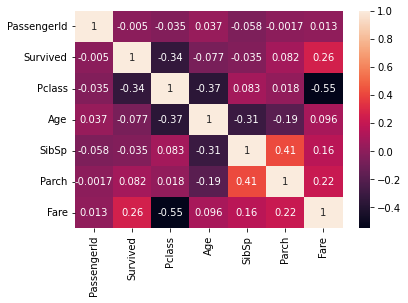

In [ ]:
sns.heatmap(train.corr(), annot=True)#查看變數的關聯性
#看起來 pclass age parch fare比較相關